### 2021_11_03_4

## Keras Deep Learning - EarlyStopping()
* 학습 조기 종료 함수

### 학습 조기 종료 시키기
* 학습의 조기 종료 함수 - EarlyStopping()
* 더 이상의 개선의 여지가 없을 때, 학습을 종료시키는 콜백함수
* fit() 함수에서는 EarlyStopping() 콜백함수가 학습 과정 중에 매번 호출됨.

### EarlyStopping 지정 방법
early_stopping = EarlyStopping()
model.fit(X_train, Y_train, nb_epoch = 1000, callbacks =  [early_stopping])

### CallBack 함수의 사용인자
keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                              min_delta = 0, 
                              patience = 0, 
                              verbose = 0, 
                              mode = 'auto')
                              
* monitor : 관찰 항목 (val_loss : 평가 비용 함수)
* min_delta : 개선되고 있다는 최소 변화량. 변화량이 적은 경우, 개선이 없음으로 판단.
* patience : 개선이 없다고 바로 종료하지 않고, 얼마나 기다려줄지 지정. 10번이라면 10번째 지속될 때, 학습 종료
* verbose : 얼마나 자세하게 정보를 볼지(0,1,2)
* mode : 관찰 항목에 대해 개선이 없다고 판단할 기준 지정.
    * auto : 관찰하는 이름에 따라 자동 지정
    * min : 관찰하는 있는 항목이 감소되는 것을 멈출 때 종료
    * max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료

In [21]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

### 데이터 나누기

In [31]:
np.random.seed(3)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
# train_rand_idxs = np.random.choice(50000, 10000)
# val_rand_idxs = np.random.choice(10000, 5000)

# X_train = X_train[train_rand_idxs]
# y_train = y_train[train_rand_idxs]
# X_val = X_val[val_rand_idxs]
# y_val = y_val[val_rand_idxs]

# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 784) (50000, 10)
(10000, 784) (10000, 10)
(10000, 784) (10000, 10)


### 모델 구성

In [32]:
# 모델 구성하기
model = Sequential()
model.add(Dense(units = 64, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

# 모델의 오차함수, 최적화 함수 설정
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'sgd', 
              metrics = ['accuracy'])

### 조기 종료시키기

In [33]:
# 모델 학습시키기
from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping() # 조기종료 콜백함수 정의
early_stopping = EarlyStopping(patience = 30) # 조기종료 콜백함수 정의

hist = model.fit(X_train, y_train, 
                 epochs = 3000, 
                 batch_size = 10, 
                 validation_data = (X_val, y_val), 
                 callbacks = [early_stopping])

Epoch 1/3000
5000/5000 [==============================] - 4s 795us/step - loss: 0.4774 - accuracy: 0.8621 - val_loss: 0.2415 - val_accuracy: 0.9300
Epoch 2/3000
5000/5000 [==============================] - 4s 730us/step - loss: 0.2288 - accuracy: 0.9333 - val_loss: 0.1856 - val_accuracy: 0.9467
Epoch 3/3000
5000/5000 [==============================] - 4s 869us/step - loss: 0.1764 - accuracy: 0.9482 - val_loss: 0.1802 - val_accuracy: 0.9481
Epoch 4/3000
5000/5000 [==============================] - 3s 687us/step - loss: 0.1463 - accuracy: 0.9572 - val_loss: 0.1347 - val_accuracy: 0.9600
Epoch 5/3000
5000/5000 [==============================] - 3s 698us/step - loss: 0.1258 - accuracy: 0.9632 - val_loss: 0.1274 - val_accuracy: 0.9634
Epoch 6/3000
5000/5000 [==============================] - 4s 731us/step - loss: 0.1110 - accuracy: 0.9675 - val_loss: 0.1200 - val_accuracy: 0.9633
Epoch 7/3000
5000/5000 [==============================] - 4s 724us/step - loss: 0.0980 - accuracy: 0.9713 - val_

In [34]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 모델 학습 과정 표시

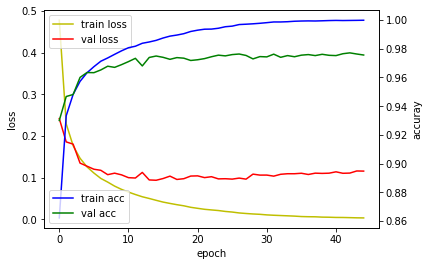

In [35]:
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label = 'train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

### 모델 평가하기

In [36]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test, y_test, batch_size = 32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.1109 - accuracy: 0.9742

loss : 0.11086329072713852
accuray : 0.9742000102996826
